In [138]:
# Import necessary libraries

In [18]:
!pip install dash plotly jupyter-dash  # Installing Dash, Plotly, and Jupyter Dash for building interactive web apps and visualizations


In [19]:
import warnings

In [20]:
warnings.filterwarnings("ignore") # Suppress all warnings

In [21]:
import tensorflow_datasets as tfds  # Import TensorFlow Datasets (TFDS) for loading datasets


In [22]:
import numpy as np  # Import NumPy for numerical operations

In [23]:
import matplotlib.pyplot as plt  # Import Matplotlib for visualizing data

In [24]:
import tensorflow as tf  # Import TensorFlow for machine learning tasks

In [25]:
from tensorflow.keras.utils import to_categorical  # Import utility to convert labels to one-hot encoding


In [26]:
from tensorflow.keras import layers, models  # Import layers and models from Keras to build the neural network


In [27]:
import dash  # Import Dash for creating interactive web apps

In [28]:
from dash import dcc, html  # Import Dash components for layout and interactivity


In [29]:
import plotly.graph_objs as go  # Import Plotly for creating interactive plots


In [30]:
from sklearn.metrics import confusion_matrix  # Import confusion matrix function for model evaluation


In [31]:
import seaborn as sns  # Import Seaborn for visualizing the confusion matrix


---
---

---
---

In [32]:
# Step 1: Data Loading and Preprocessing

In [33]:
# Load MNIST dataset using TensorFlow Datasets (automatically handles downloading and preprocessing)


In [34]:
train_data, test_data = tfds.load('mnist', as_supervised=True, split=['train', 'test'])  # Load train and test splits from MNIST dataset


In [35]:
# Normalize and preprocess the data

In [36]:
def preprocess_image(image, label):
    """
    Normalize the image to the [0, 1] range and reshape the image to (28, 28, 1).
    This is done for both the training and test data.
    """
    image = tf.cast(image, tf.float32) / 255.0  # Normalize pixel values to [0, 1]
    image = tf.reshape(image, (28, 28, 1))  # Reshape image to 28x28 with 1 color channel (grayscale)
    return image, label

In [37]:
# Apply preprocessing function to both training and test data

In [132]:
train_data = train_data.map(preprocess_image)  # Apply preprocessing to training data


In [39]:
test_data = test_data.map(preprocess_image)  # Apply preprocessing to test data


In [40]:
# Batch and shuffle the training data

In [41]:
train_data = train_data.shuffle(60000).batch(32)  # Shuffle the training data and batch into 32 samples per batch


In [42]:
test_data = test_data.batch(32)  # Batch the test data into 32 samples per batch


In [43]:
# Print the shape of the training data to verify

In [136]:
for images, labels in train_data.take(1):  # Take one batch from the training data
    print("Training data shape:", images.shape)  # Print the shape of images in the batch
    print("Labels shape:", labels.shape)  # Print the shape of labels in the batch


Training data shape: (32, 28, 28, 1)
Labels shape: (32,)


----
---

---
---

In [45]:
# Step 2: Data Visualization

In [46]:
# Visualize the first 25 training images and their corresponding labels

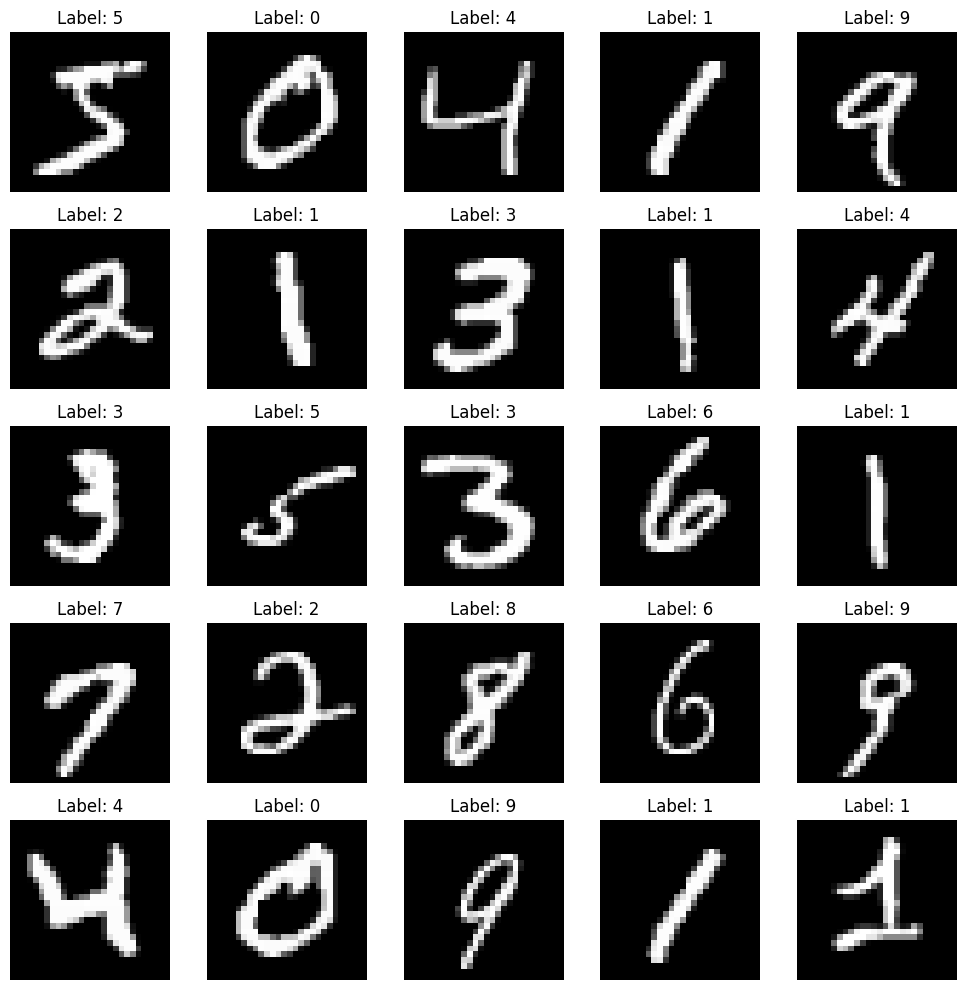

In [47]:
fig, axes = plt.subplots(5, 5, figsize=(10, 10))  # Create a 5x5 grid of subplots
axes = axes.flatten()  # Flatten the 2D array of axes to make it easier to loop through

for i in range(25):  # Loop through the first 25 images in the training set
    ax = axes[i]  # Get the current subplot axis
    ax.imshow(train_images[i].reshape(28, 28), cmap='gray')  # Display image, reshaped to 28x28, in grayscale
    ax.set_title(f"Label: {train_labels[i].argmax()}")  # Display the label (argmax for one-hot encoded labels)
    ax.axis('off')  # Turn off axis lines for better visualization

plt.tight_layout()  # Adjust subplots to minimize gaps between them
plt.show()  # Show the plot

---
---

---
---

In [48]:
# Step 3: Model Architecture

In [49]:
# Build the Convolutional Neural Network (CNN) model

In [50]:
model = models.Sequential()  # Initialize a Sequential model (stack of layers)


In [51]:
# Add a convolutional layer with 32 filters, 3x3 kernel size, ReLU activation, and input shape of (28, 28, 1)


In [52]:
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))


In [53]:
# Add a max-pooling layer to reduce spatial dimensions (2x2 pool size)

In [54]:
model.add(layers.MaxPooling2D((2, 2)))

In [55]:
# Add another convolutional layer with 64 filters and 3x3 kernel size

In [56]:
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [57]:
# Add another max-pooling layer to further reduce spatial dimensions

In [58]:
model.add(layers.MaxPooling2D((2, 2)))

In [59]:
# Add a third convolutional layer with 64 filters

In [60]:
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [61]:
# Flatten the 2D feature maps into a 1D vector for the dense layers

In [62]:
model.add(layers.Flatten())

In [63]:
# Add a fully connected (dense) layer with 64 neurons and ReLU activation

In [64]:
model.add(layers.Dense(64, activation='relu'))

In [65]:
# Add the output layer with 10 neurons (one for each digit) and softmax activation for classification


In [66]:
model.add(layers.Dense(10, activation='softmax'))

In [67]:
# Print the summary of the model architecture to see the details

In [68]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

----
----

---
---

In [69]:
# Step 4: Model Compilation

In [70]:
# Compile the model using the Adam optimizer and categorical crossentropy loss function for multi-class classification


In [71]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

----
----

----
----

In [72]:
# Step 5: Model Training

In [91]:
# Train the model with the training data

In [90]:
history = model.fit(train_images, train_labels,
                    epochs=10,  # Number of epochs to train
                    batch_size=64,  # Batch size for each update
                    validation_data=(test_images, test_labels))  # Use test data for validation


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.9964 - loss: 0.0138 - val_accuracy: 0.9917 - val_loss: 0.0326
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9985 - loss: 0.0054 - val_accuracy: 0.9916 - val_loss: 0.0410
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9985 - loss: 0.0048 - val_accuracy: 0.9897 - val_loss: 0.0501
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9987 - loss: 0.0039 - val_accuracy: 0.9916 - val_loss: 0.0357
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9986 - loss: 0.0037 - val_accuracy: 0.9911 - val_loss: 0.0400
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9985 - loss: 0.0050 - val_accuracy: 0.9926 - val_loss: 0.0380
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9988 - loss: 0.0038 - val_accuracy: 0.9924 - val_loss: 0.0406
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9989 - loss: 0.0036 - val_accuracy: 0

---
---

----
----

In [92]:
# Step 6: Model Evaluation

In [93]:
# Evaluate the model on the test data to see how well it generalizes to new, unseen data


In [94]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)


313/313 - 1s - 3ms/step - accuracy: 0.9903 - loss: 0.0490


In [95]:
# Print the test accuracy and loss values

In [96]:
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

Test Accuracy: 0.9903
Test Loss: 0.0490


---
---

---
---

In [97]:
# Step 8: Making Predictions

In [98]:
# Get predictions on the first 10 test images

In [99]:
predictions = model.predict(test_images[:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


In [100]:
# Convert the predictions to class labels (highest probability)

In [101]:
predicted_labels = np.argmax(predictions, axis=1)

In [102]:
true_labels = np.argmax(test_labels[:10], axis=1)  # Convert one-hot labels to integer labels


In [103]:
# Print the predicted and true labels for comparison

In [104]:
for i in range(10):
    print(f"Image {i + 1}:")
    print(f"Predicted Label: {predicted_labels[i]}")
    print(f"True Label: {true_labels[i]}")
    print("-" * 30)

Image 1:
Predicted Label: 7
True Label: 7
------------------------------
Image 2:
Predicted Label: 2
True Label: 2
------------------------------
Image 3:
Predicted Label: 1
True Label: 1
------------------------------
Image 4:
Predicted Label: 0
True Label: 0
------------------------------
Image 5:
Predicted Label: 4
True Label: 4
------------------------------
Image 6:
Predicted Label: 1
True Label: 1
------------------------------
Image 7:
Predicted Label: 4
True Label: 4
------------------------------
Image 8:
Predicted Label: 9
True Label: 9
------------------------------
Image 9:
Predicted Label: 5
True Label: 5
------------------------------
Image 10:
Predicted Label: 9
True Label: 9
------------------------------


---
---

---
---

In [105]:
# Step 9: Visualizing Predictions

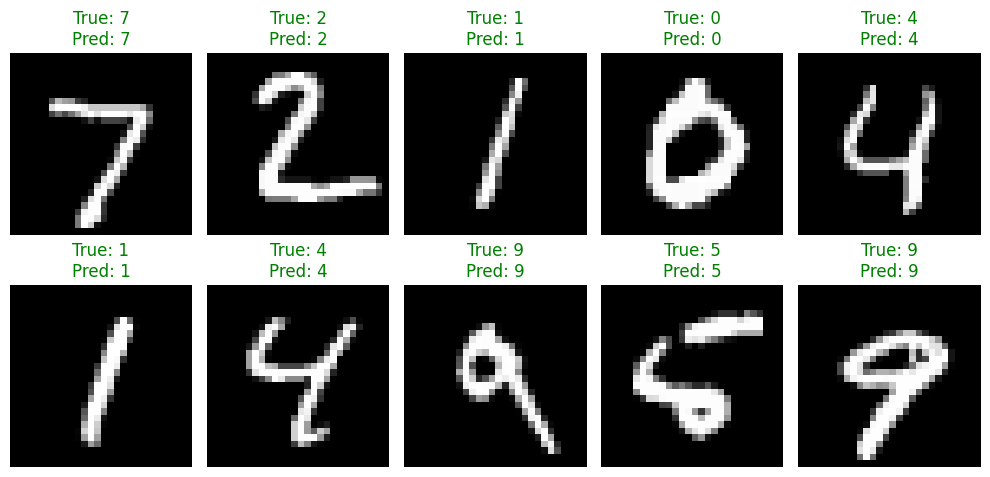

In [106]:
plt.figure(figsize=(10, 5)) # Set up the plot

# Loop through the first 10 test images and display them along with their predictions
for i in range(10):
    plt.subplot(2, 5, i + 1)  # Create a subplot (2 rows, 5 columns)

    # Display the image
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')

    # Check if the prediction matches the true label
    if predicted_labels[i] == true_labels[i]:
        color = 'green'  # Correct prediction
    else:
        color = 'red'    # Incorrect prediction

    # Display the true and predicted labels
    plt.title(f"True: {true_labels[i]}\nPred: {predicted_labels[i]}", color=color)

    plt.axis('off')  # Turn off axis for cleaner visualization

plt.tight_layout()  # Adjust subplots to avoid overlap
plt.show()  # Show the plot

---
---

---
---

In [107]:
# Step 10: Confusion Matrix

In [108]:
# Compute confusion matrix to evaluate the performance of the model

In [109]:
cm = confusion_matrix(true_labels, predicted_labels)

In [110]:
# Plot the confusion matrix as a heatmap using Seaborn

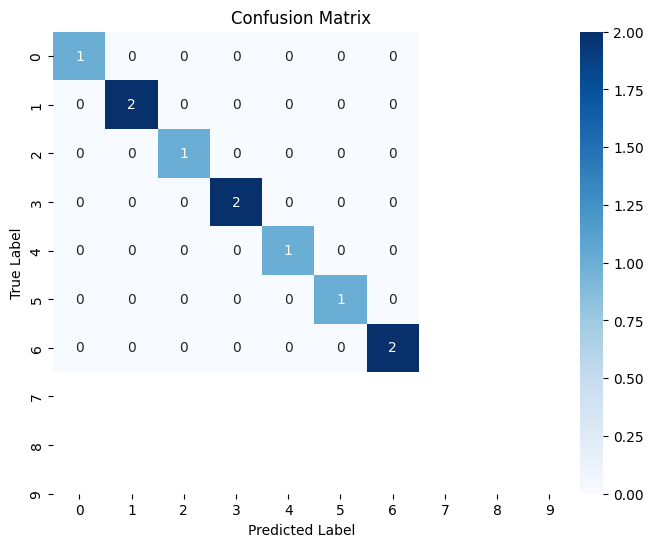

In [111]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title('Confusion Matrix')  # Set the title of the confusion matrix
plt.xlabel('Predicted Label')  # Label for the x-axis
plt.ylabel('True Label')  # Label for the y-axis
plt.show()  # Display the confusion matrix heatmap

---
---

---
---

In [112]:
# Step 11: Model Persistence

In [113]:
# Save the trained model to a file (so it can be loaded later without retraining)


In [114]:
model.save('handwritten_digit_recognition_model.h5')

-----
----

---
---

In [115]:
# Step 12: Load the Saved Model

In [116]:
# Load the previously saved model from the .h5 file

In [117]:
loaded_model = tf.keras.models.load_model('handwritten_digit_recognition_model.h5')


---
---

---
---

In [118]:
# Step 13: Evaluate the Loaded Model

In [119]:
# Evaluate the loaded model on the test data to check its performance after loading


In [120]:
test_loss, test_accuracy = loaded_model.evaluate(test_images, test_labels, verbose=2)


313/313 - 1s - 5ms/step - accuracy: 0.9903 - loss: 0.0490


In [121]:
# Print the test accuracy and loss for the loaded model

In [122]:
print(f"Test Accuracy of the loaded model: {test_accuracy:.4f}")
print(f"Test Loss of the loaded model: {test_loss:.4f}")

Test Accuracy of the loaded model: 0.9903
Test Loss of the loaded model: 0.0490


---
---

---
---

In [123]:
# Step 14: Dash Web App for Displaying Predictions

In [124]:
# Initialize Dash app

In [125]:
app = dash.Dash(__name__)

In [137]:
# Define layout of the app (including a slider to select images and display the image with its predicted label)


In [127]:
app.layout = html.Div([
    html.H1("MNIST Handwritten Digit Recognition"),  # Heading of the web page
    dcc.Slider(  # Slider to select which image to display
        id='image-slider',
        min=0,
        max=100,  # Slider range from 0 to 100
        step=1,
        value=0,  # Default value is the first image
        marks={i: str(i) for i in range(0, 101, 10)},  # Display marks at every 10th index
    ),
    html.Div(id='image-display'),  # Area to display the image and predicted label
])

In [128]:
#  Define the Callback to Update Image

In [129]:
@app.callback(
    dash.dependencies.Output('image-display', 'children'),
    [dash.dependencies.Input('image-slider', 'value')]
)
def update_image(index):
    """
    Callback function to update the displayed image and predicted label based on slider value.
    """
    image = test_images[index].reshape(28, 28)  # Get the selected image
    label = true_labels[index]  # Get the true label
    predicted_label = predicted_labels[index]  # Get the predicted label

    # Display the image and prediction
    return html.Div([
        html.Img(src='data:image/png;base64,{}'.format(base64.b64encode(image.tobytes()).decode()),
                 style={'height': '300px', 'width': '300px'}),
        html.H3(f"True Label: {label}, Predicted Label: {predicted_label}")
    ])

In [130]:
# Run the app on localhost

In [131]:
if __name__ == '__main__':
    app.run_server(debug=True)

<IPython.core.display.Javascript object>

---
---